In [1]:
#import libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
#import dataframe
path = r'C:\Users\nrsmi\OneDrive\Documents\CareerFoundry\09-2024 Advanced Analytics & Dashboard\Python\10-2024 Analyzing Global Temperature Changes'
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared Data', 'df_TC_climate_region_CLEAN.csv'), index_col = False)

In [5]:
df.head()

,Country,Months,Element,Year,Temperature,Region,Climate
0,Afghanistan,January,Temperature Change,1961,0.777,Asia,Continental
1,Afghanistan,February,Temperature Change,1961,-1.743,Asia,Continental
2,Afghanistan,March,Temperature Change,1961,0.516,Asia,Continental
3,Afghanistan,April,Temperature Change,1961,-1.709,Asia,Continental
4,Afghanistan,May,Temperature Change,1961,1.412,Asia,Continental


In [6]:
# Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
df2 = df[['Year', 'Temperature']]

In [7]:
df2.head()

,Year,Temperature
0,1961,0.777
1,1961,-1.743
2,1961,0.516
3,1961,-1.709
4,1961,1.412


In [8]:
df2.shape

(180540, 2)

In [9]:
#remove null values
df2 = df2.dropna()

In [10]:
df2.shape

(159632, 2)

# 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [12]:
#elbow technique

num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [13]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-46609081.831867486,
 -11668850.117295308,
 -5287777.323166194,
 -3042269.2234316026,
 -2014228.5476817277,
 -1434632.1395692143,
 -1103176.3785519872,
 -875290.8331741274,
 -723797.6318713363]

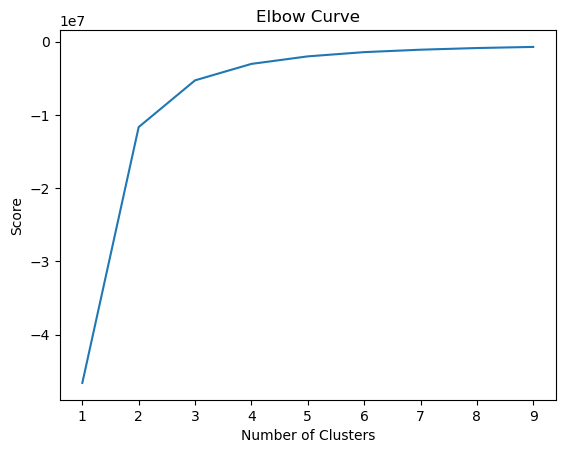

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
Explain why you chose that number in a markdown cell.

### Based on this pattern, I would choose 3 clusters for the k-means algorithm. 

### Looking at the numbers, we can see that the largest drop is between the first few values: from 
### −46609081.83 to −11668850.12, and then from −11668850.12 to −5307255.47.

### After 𝑘=3, the decrease in values gets smaller each time another cluster is added.

# 5. Run the k-means algorithm.

In [18]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [19]:
# Fit the k-means object to the data.
kmeans.fit(df2)

KMeans(n_clusters=3)

In [20]:
df2['clusters'] = kmeans.fit_predict(df2)

In [39]:
df2.head()

,Year,Temperature,clusters
0,1961,0.777,2
1,1961,-1.743,2
2,1961,0.516,2
3,1961,-1.709,2
4,1961,1.412,2


In [41]:
df2['clusters'].value_counts()

clusters
0    53712
1    53686
2    52234
Name: count, dtype: int64

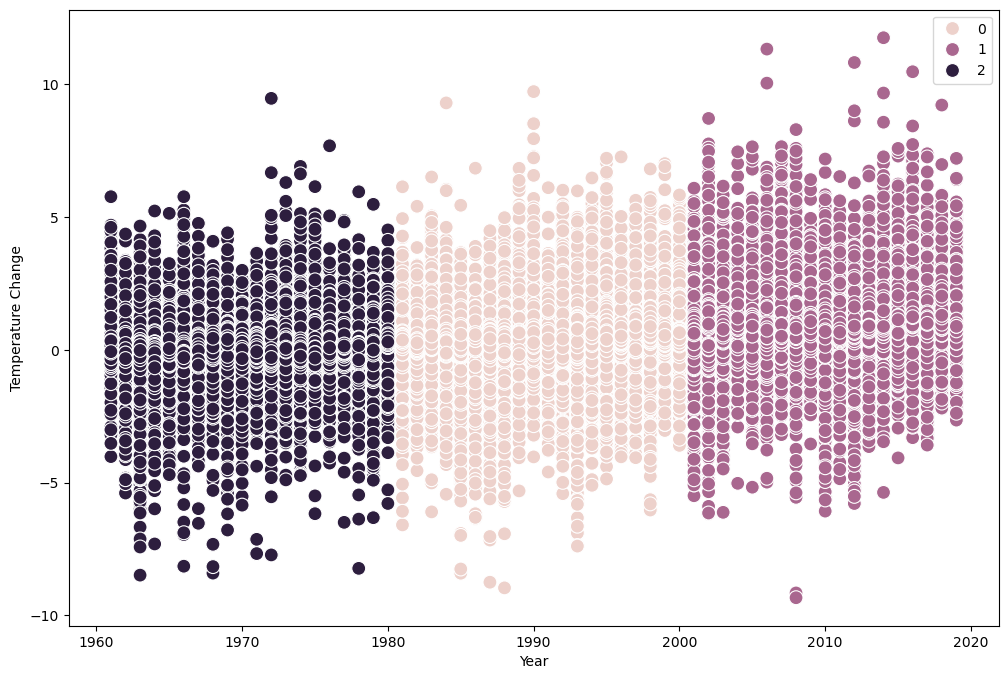

In [45]:
# Plot the clusters the variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Year'], y=df2['Temperature'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Temperature Change') # Label y-axis.
plt.show()

# 8. Discuss how and why the clusters make sense.

### The clusters make sense because they group data by different time periods, each showing its own pattern of temperature changes. The earliest years (1960s to 1970s) seem to have smaller changes, reflecting a time when possible global warming effects were less pronounced. The middle period (1980s to around 2000) shows more noticeable changes, likely caused by an increase in industrial growth and environmental impacts.
### The most recent years (2000s onward) display the largest temperature changes, aligning with hypothesis of global warming. Each cluster represents a distinct stage in temperature patterns over time, helping us see how environmental and human factors have likely influenced these shifts across decades.

# 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [47]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pink'

In [49]:
df2.groupby('cluster').agg({'Year':['mean', 'median'], 
                         'Temperature':['mean', 'median']})

Year         Temperature       
                    mean  median        mean median
cluster                                            
dark purple  1970.518034  1971.0   -0.001891 -0.003
pink         1990.677428  1991.0    0.397901  0.373
purple       2010.010524  2010.0    1.028299  0.942

# 10. Propose what these results could be useful for in future steps of an analytics pipeline.

- The averages for each time period show how temperature changes have grown over the years. This helps us see long-term trends and understand how climate has changed over time.
- By knowing the average temperature changes for each period, we can use this information to make predictions about future temperatures and see how they might keep rising.
- Having distinct periods (early, middle, recent) allows us to compare how fast temperatures increased in each time frame, which can reveal the impact of industrial growth or environmental actions.
- These clusters set a "normal" range for each period. We can compare future data to these averages to quickly spot any unusual or extreme changes in temperature.
- These insights could help guide climate policies by showing how human activities have affected temperature over time, helping policymakers make informed decisions to slow down climate change.